```{admonition} Lecture Materials
:class: tip
[Download the slide deck for this lecture](/_static/pdf/Lecture8-NumericalIntegration.pdf)
```

# Basic methods

Consider a generic problem of integrating a function over some interval:

$$
I = \int_{a}^b f(x) \, dx
$$


```{figure} numint.png
:width: 400px
:align: center
:name: fig-numint
```

We may need to resort to numerical integration when:
- we have no explicit expression for $f(x)$ but only know its values at certain points
- we do not know how to evaluate the antiderivative of $f(x)$ even if we know $f(x)$ itself

There are two main types of numerical integration methods:
- direct evaluation of the integral over the interval (a,b)
- composite methods where the integration interval is separated into sub-intervals

The most common methods are:

- Rectangle, trapezoidal and Simpson rules
- Quadratures (Newton-Cotes, Gaussian)


Adaptive quadratures: divide the integration range into subintervals to control the error

<!-- ## Basic methods -->

The basic methods make use of interpretation of the integral as an area under the curve and approximating this area by simple shapes (rectangles, trapezoids, etc.).

### Rectangle rule

#### Basic rectangle rule

Approximate the integral by an area of a rectangle:

$$
\int_{a}^b f(x) \, dx \approx (b - a) \, f\left(\frac{a+b}{2}\right)
$$

#### Composite rectangle rule

To improve the accuracy, separate the integration interval into $N$ subintervals of length $h = (b-a)/N$ and apply the rectangle rule to each of them.
This leads to the so-called composite (extended) rectangle rule:

$$
\int_a^b f(x) \approx h \sum_{k=1}^N f(x_k), \qquad k = 1,\ldots, N
$$

with

$$
x_k = a + \frac{2k-1}{2} h~.
$$

```{figure} rect_rule_n.png
:width: 400px
:align: center
:name: fig-rectangle_rule
```


#### Implementation

In [2]:
# Rectangle rule for numerical integration 
# of function f(x) over (a,b) using n subintervals
def rectangle_rule(f, a, b, n):
    h = (b - a) / n
    ret = 0.0
    xk = a + h / 2.
    for k in range(n):
        ret += f(xk) * h
        xk += h
    return ret

In [3]:
# Visualize
def rectangle_rule_plot(f, a, b, n, numpoints = 100):
    xplot = np.linspace(0,2,numpoints)
    yplot = f(xplot)

    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.xlim(0,2)
    plt.axhline(y = 0., color = 'black', linestyle = '--')
    plt.plot(xplot,yplot, color = 'red',label='f(x)')
    
    labelrec = "rectangle rule, (N = " + str(n) + ")"
    
    xks = []
    fks = []
    h = (b - a) / n
    xk = a + h / 2.
    for k in range(1,n+1):
        fval = f(xk)
        if (k == 1):
            plt.plot([xk - h/2., xk - h/2., xk + h/2., xk + h/2.,xk - h/2.], [0.,fval,fval,0.,0.], 
                     color = 'blue', label=labelrec)
        else:
            plt.plot([xk - h/2., xk - h/2., xk + h/2., xk + h/2.,xk - h/2.], [0.,fval,fval,0.,0.], 
                     color = 'blue')
        
        xks.append(xk)
        fks.append(fval)
        
        xk += h
    
    plt.plot(xks,fks,'.', color = 'blue')
    plt.legend()
    
    return plt

Consider a function $f(x) = x^4 - 2x + 2$ and its integral over $(0,2)$.
We can compute the exact value of the integral analytically:

$$
\int_0^2 ( x^4 - 2x + 2) dx = \left. \frac{x^5}{5} - x^2 + 2x \right|_0^2 = 6.4
$$

We can use this function to test the accuracy of the numerical integration methods.

In [4]:
# The function example we will use
# Overwrite as applicable

flabel = 'x^4 - 2x + 2'
def f(x):
    return x**4 - 2*x + 2
flimit_a = 0.
flimit_b = 2.

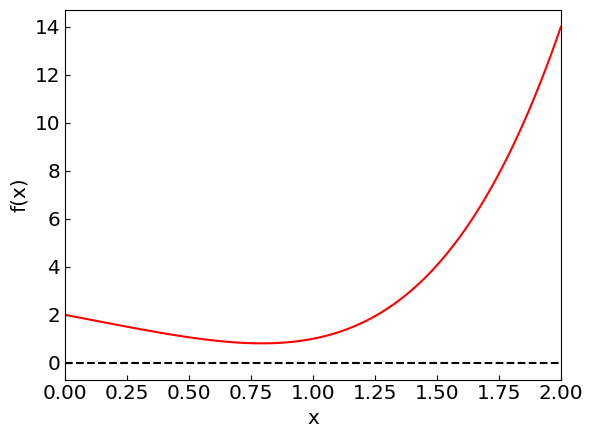

In [5]:
# Preliminaries: import numpy, matplotlib and set default styles
import numpy as np
import matplotlib.pyplot as plt

# Default style parameters (feel free to modify as you see fit)
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'xtick.direction':'in',
         'ytick.direction':'in',
         }
plt.rcParams.update(params)

numpoints = 100
xplot = np.linspace(0,2,numpoints)

yplot = f(xplot)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.xlim(0,2)
plt.axhline(y = 0., color = 'black', linestyle = '--')
plt.plot(xplot,yplot, color = 'red')
plt.show()

#### Illustration

Let us evaluate the performance of numerical integration

Computing the integral of x^4 - 2x + 2 over the interval ( 0.0 , 2.0 ) using rectangle rule
N = 1 , I =  2.0
N = 2 , I =  5.125
N = 3 , I =  5.818930041152262
N = 4 , I =  6.0703125
N = 5 , I =  6.188159999999999
N = 6 , I =  6.252572016460903
N = 7 , I =  6.291545189504369
N = 8 , I =  6.31689453125
N = 9 , I =  6.334298633338417
N = 10 , I =  6.346759999999996
N = 11 , I =  6.355986612936278
N = 12 , I =  6.363007973251031
N = 13 , I =  6.368474493190009
N = 14 , I =  6.37281341107871
N = 15 , I =  6.376314732510287
N = 16 , I =  6.379180908203125
N = 17 , I =  6.381556734234506
N = 18 , I =  6.383547985571311
N = 19 , I =  6.385233385256395
N = 20 , I =  6.386672500000006
N = 21 , I =  6.387911072718333
N = 22 , I =  6.388984700498595
N = 23 , I =  6.3899214196633
N = 24 , I =  6.3907435538837385
N = 25 , I =  6.391469056000005
N = 26 , I =  6.392112496061053
N = 27 , I =  6.392685798298071
N = 28 , I =  6.393198797376085
N = 29 , I =  6.393659662849694
N = 30 , I =  6.3940752263374

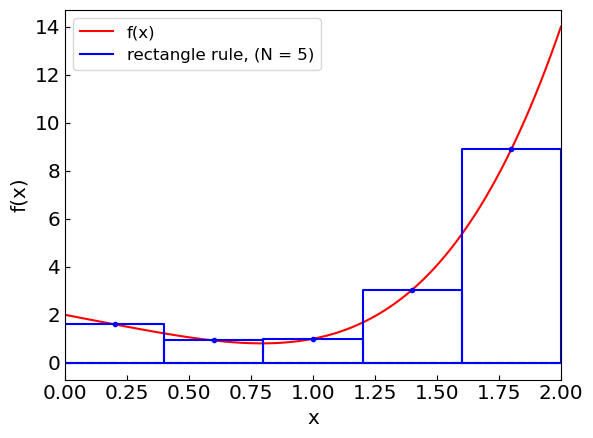

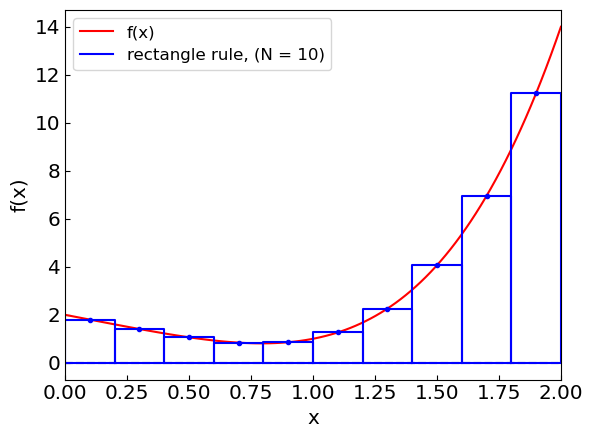

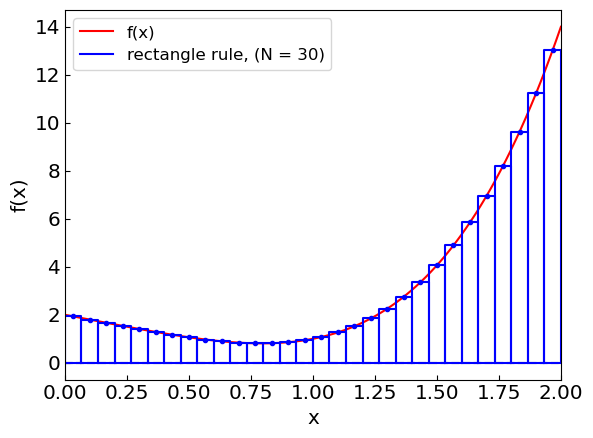

In [6]:
a = flimit_a
b = flimit_b
print("Computing the integral of",flabel, "over the interval (",a,",",b,") using rectangle rule")
for n in range(1,31):
    print("N =",n,", I = ",rectangle_rule(f,a,b,n))
    
rectangle_rule_plot(f,a,b,5).show()
rectangle_rule_plot(f,a,b,10).show()
rectangle_rule_plot(f,a,b,30).show()

In [7]:
# Animate

import os
import matplotlib.animation as animation
import imageio.v2 as imageio

def integrate_animate(f, flabel, a, b, rule, rule_plot, filename = 'rectangle.gif', nstart = 1, iterations = 8):
    labelgif = filename

    filenames = []
    n = nstart
    for ind in range(1,iterations):
        # create file name and append it to a list
        filename = f'{ind}.png'
        filenames.append(filename)

        plot = rule_plot(f,a,b,n)
        val = rule(f,a,b,n)
        plot.title('I = ' + str(val))
        plot.savefig(filename)
        plot.close()

        n *= 2

    # build gif
    with imageio.get_writer(labelgif, mode='I', loop=0, duration=2000) as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

    # Remove files
    for filename in set(filenames):
        os.remove(filename)

Let us illustrate the composite rectangle rule approximation as we increase the number of subintervals.

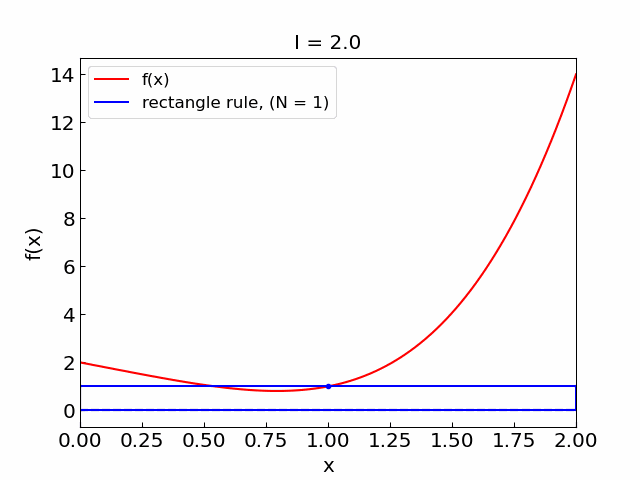

In [8]:
integrate_animate(f,flabel,flimit_a,flimit_b,rectangle_rule,rectangle_rule_plot,'rectangle_rule.gif', 1, 8)

from IPython.display import display, Image, clear_output
display(Image(filename='rectangle_rule.gif'))

#### Error

The error for a rectangle rule can be shown to be equal to (using the Taylor theorem):

$$
\int_a^b f(x) dx -  (b - a) \, f\left(\frac{a+b}{2}\right) \approx \frac{(b-a)^3}{24} f''(a)
$$

to leading order in $(b-a)$.

For the composite rectangle rule, we have this rule for each subinterval $h = (b-a) / N$ and we have to sum up the errors from each interval. We have

$$
I - I_{\rm rect} = (b-a) \frac{h^2}{24} \, f''(a) + \mathcal{O}(h^4).
$$

The rectangle rule is exact (up to round-off errors) for the integration of linear functions ($f'' = 0$ and all higher-order derivatives).

In [9]:
flabellinear = 'f(x) = 2*x + 3'
def flinear(x):
    return 2. * x + 3.

a = 0.
b = 2.
for n in range(1,6):
    print("N =",n,", I = ",rectangle_rule(flinear,a,b,n))

N = 1 , I =  10.0
N = 2 , I =  10.0
N = 3 , I =  9.999999999999998
N = 4 , I =  10.0
N = 5 , I =  10.0


### Trapezoidal rule

#### Basic trapezoidal rule

Approximate the integral by an area of a trapezoid.
This is achieved by linear interpolation of the function between (sub)interval endpoints:

$$
\int_{a}^b f(x) \, dx \approx (b-a) \, \frac{f(a) + f(b)}{2}~.
$$

#### Composite trapezoidal rule

As for rectangle rule, to improve the accuracy, separate the integration interval into $N$ subintervals of length $h = (b-a)/N$ and apply the trapezoidal rule to each of them

$$
\int_a^b f(x) \approx h \sum_{k=0}^{N-1} \frac{f(x_k) + f(x_{k+1})}{2}, \qquad k = 0,\ldots, N-1
$$

with

$$
x_k = a +  k h~.
$$

```{figure} trap_rule_n.png
:width: 400px
:align: center
:name: fig-trap_rule
```

#### Implementation

In [13]:
# Trapezoidal rule for numerical integration 
# of function f(x) over (a,b) using n subintervals
def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    ret = 0.0
    xk = a
    fk = f(xk)
    for k in range(n):
        xk += h
        fk1 = f(xk)
        ret += h * (fk + fk1) / 2.
        fk = fk1
    return ret

In [ ]:
# Visualize
def trapezoidal_rule_plot(f, a, b, n, numpoints = 100):
    xplot = np.linspace(0,2,numpoints)
    yplot = f(xplot)

    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.xlim(0,2)
    plt.axhline(y = 0., color = 'black', linestyle = '--')
    plt.plot(xplot,yplot, color = 'red',label='f(x)')
    
    labelrec = "trapezoidal rule, (N = " + str(n) + ")"
    
    xks = []
    fks = []
    h = (b - a) / n
    xk = a
    fk = f(xk)
    for k in range(1,n+1):
        xk += h
        fk1 = f(xk)
        if (k == 1):
            plt.plot([xk - h, xk - h, xk, xk,xk - h], [0.,fk,fk1,0.,0.], 
                     color = 'blue', label=labelrec)
        else:
            plt.plot([xk - h, xk - h, xk, xk,xk - h], [0.,fk,fk1,0.,0.], 
                     color = 'blue')
                    
        xks.append(xk)
        fks.append(fk1)
        
        fk = fk1
    
    plt.plot(xks,fks,'.', color = 'blue')
    plt.legend()
    
    return plt

#### Illustration

Let us test the method on our function $f(x) = x^4 - 2x + 2$ over the interval $(0,2)$.

In [15]:
a = flimit_a
b = flimit_b
print("Computing the integral of",flabel, "over the interval (",a,",",b,") using trapezoidal rule")
for n in range(1,31):
    print("N =",n,", I = ",trapezoidal_rule(f,a,b,n))

Computing the integral of x^4 - 2x + 2 over the interval ( 0.0 , 2.0 ) using trapezoidal rule
N = 1 , I =  16.0
N = 2 , I =  9.0
N = 3 , I =  7.572016460905349
N = 4 , I =  7.0625
N = 5 , I =  6.824960000000001
N = 6 , I =  6.695473251028805
N = 7 , I =  6.61724281549354
N = 8 , I =  6.56640625
N = 9 , I =  6.531524665955397
N = 10 , I =  6.506559999999999
N = 11 , I =  6.488081415203885
N = 12 , I =  6.474022633744856
N = 13 , I =  6.463079023843701
N = 14 , I =  6.454394002498951
N = 15 , I =  6.447386337448559
N = 16 , I =  6.441650390625
N = 17 , I =  6.4368961099603705
N = 18 , I =  6.432911649646909
N = 19 , I =  6.429539368175497
N = 20 , I =  6.426660000000005
N = 21 , I =  6.424181968075723
N = 22 , I =  6.422034014070073
N = 23 , I =  6.420160019439603
N = 24 , I =  6.418515303497934
N = 25 , I =  6.417063936000004
N = 26 , I =  6.41577675851685
N = 27 , I =  6.4146299087449545
N = 28 , I =  6.41360370678883
N = 29 , I =  6.412681805392758
N = 30 , I =  6.411850534979421


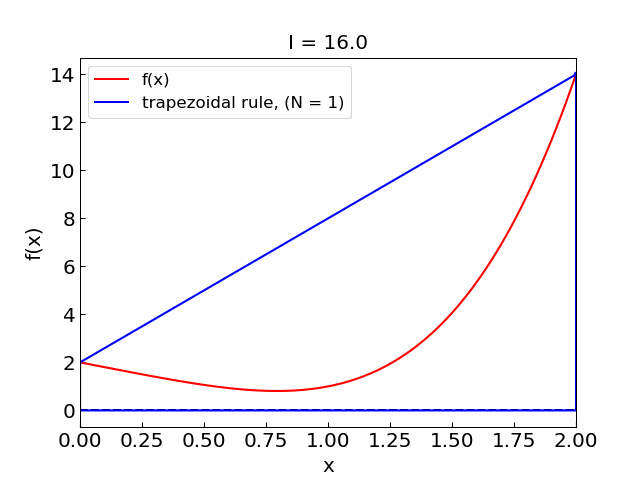

In [16]:
integrate_animate(f,flabel,flimit_a,flimit_b,trapezoidal_rule,trapezoidal_rule_plot,'trapezoidal_rule.gif', 1, 8)

from IPython.display import display, Image, clear_output
display(Image(filename='trapezoidal_rule.gif'))

#### Error 

The error for the trapezoidal rule can be shown to be equal to (using the Taylor theorem):
$$
I - I_{\rm trap} = \int_a^b f(x) dx ~~ - ~~ (b-a) \, \frac{f(a) + f(b)}{2} \approx -\frac{(b-a)^3}{12} f''(a)
$$
to leading order in $(b-a)$.

For the composite trapezoidal rule we have:
$$
I - I_{\rm trap} = -(b-a) \frac{h^2}{12} \, f''(a) + \mathcal{O}(h^4).
$$

Just like the rectangle rule, the trapezoidal rule is exact for the integration of linear functions ($f'' = 0$ and all higher-order derivatives).

N = 1 , I =  10.0
N = 2 , I =  10.0
N = 3 , I =  9.999999999999998
N = 4 , I =  10.0
N = 5 , I =  10.0


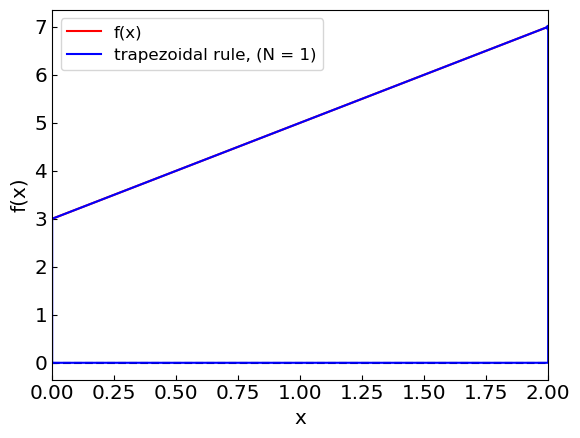

In [17]:
flabellinear = 'f(x) = 2*x + 3'
def flinear(x):
    return 2. * x + 3.

a = 0.
b = 2.
for n in range(1,6):
    print("N =",n,", I = ",trapezoidal_rule(flinear,a,b,n))
    
trapezoidal_rule_plot(flinear,a,b,1).show()

### Simpson's rule

#### Derivation

Recall the error estimate for rectangle and trapezoidal rules:

$$
I - I_{\rm rect} = \frac{(b-a)^3}{24} f''(a) + \mathcal{O}(h^4)
$$

and

$$
I - I_{\rm trap} = -\frac{(b-a)^3}{12} f''(a) + \mathcal{O}(h^4).
$$

Simpson's rule is a combination of rectangle and trapezoidal rules:

$$
I_S = \frac{2I_{\rm rect} + I_{\rm trap}}{3}.
$$

This combination is chosen such that $O[(b-a)^3]$ error term vanishes. 
Another way to derive Simpson's rule is to interpolate the integrand by a quadratic polynomial through the endpoints and the midpoint.

Simpson's rule reads

$$
\int_{a}^b f(x) \, dx \approx \frac{(b-a)}{6} \, \left[f(a) + 4 f \left( \frac{a+b}{2} \right) + f(b)\right].
$$

#### Composite Simpson's rule

In the composite Simpson's rule one splits the integration interval into an even number $N$ of subintervals.
With $h = (b-a)/N$ one has

$$
\int_a^b f(x) \approx \frac{h}{3} \left[f(x_0) + 4 \sum_{k=1}^{N/2} f(x_{2k-1}) + 2 \sum_{k=1}^{N/2-1} f(x_{2k}) + f(x_N) \right], \qquad k = 0,\ldots, N
$$

with

$$
x_k = a +  k h~.
$$

#### Implementation

In [20]:
# Simpson's rule for numerical integration 
# of function f(x) over (a,b) using n subintervals
def simpson_rule(f, a, b, n):
    if n % 2 == 1:
        raise ValueError("Number of subintervals must be even for Simpson's rule.")

    h = (b - a) / n
    ret = f(a) + f(b)
    for k in range(1, n, 2):
        xk = a + k * h 
        ret += 4 * f(xk)
    for k in range(2, n-1, 2):
        xk = a + k * h
        ret += 2 * f(xk)
    ret *= h / 3.0
    return ret

In [21]:
# Visualize
def simpson_rule_plot(f, a, b, n, numpoints = 100):
    tn = n
    if (tn == 1):
        tn = 2
    if tn % 2 == 1:
        raise ValueError("Number of subintervals must be even for Simpson's rule.")
    
    xplot = np.linspace(0,2,numpoints)
    yplot = f(xplot)

    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.xlim(0,2)
    plt.axhline(y = 0., color = 'black', linestyle = '--')
    plt.plot(xplot,yplot, color = 'red',label='f(x)')
    
    def PolySimpson(x,a,b,m,fa,fb,fm):
        ret = 0.
        ret += fa * (x - m) * (x - b) / (a - m) / (a - b)
        ret += fm * (x - a) * (x - b) / (m - a) / (m - b)
        ret += fb * (x - a) * (x - m) / (b - a) / (b - m)
        return ret
    
    labelrec = "Simpson's rule, (N = " + str(n) + ")"
    
    xks = []
    fks = []
    h = (b - a) / tn
    for k in range(1,tn,2):
        x1 = a + h * (k-1)
        x2 = a + h * k
        x3 = a + h * (k+1)
        f1 = f(x1)
        f2 = f(x2)
        f3 = f(x3)
        
        xks.append([x1,x2,x3])
        fks.append([f1,f2,f3])
        
        numpointssubplot = 50
        xsubplot = np.linspace(x1,x3,numpointssubplot)
        ysubplot = PolySimpson(xsubplot, x1, x3, x2, f1, f3, f2)
        
        if (k == 1):
            plt.plot(xsubplot, ysubplot, 
                     color = 'blue', label=labelrec)
        else:
            plt.plot(xsubplot, ysubplot, 
                     color = 'blue')
    
    plt.plot(xks,fks,'.', color = 'blue')
    plt.legend()
    
    return plt

#### Illustration

In [22]:
a = 0.
b = 2.
print("Computing the integral of",flabel, "over the interval (",a,",",b,") using Simpson's rule")
for n in range(2,15,2):
    print("N =",n,", I = ",simpson_rule(f,a,b,n))

Computing the integral of x^4 - 2x + 2 over the interval ( 0.0 , 2.0 ) using Simpson's rule
N = 2 , I =  6.666666666666666
N = 4 , I =  6.416666666666666
N = 6 , I =  6.403292181069957
N = 8 , I =  6.401041666666666
N = 10 , I =  6.400426666666667
N = 12 , I =  6.4002057613168715
N = 14 , I =  6.400111064834095


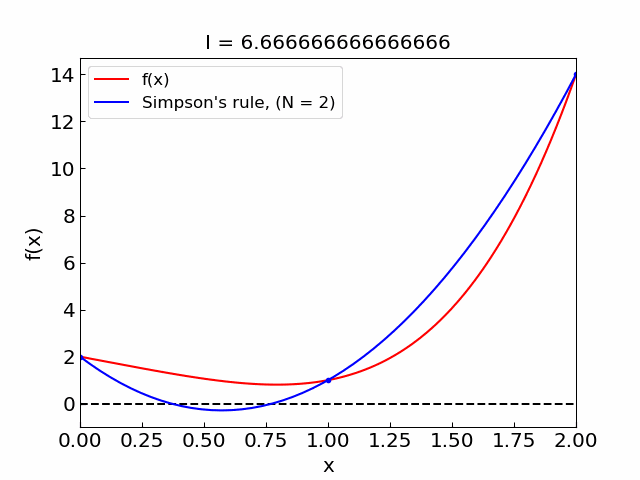

In [23]:
integrate_animate(f,flabel,flimit_a,flimit_b,simpson_rule,simpson_rule_plot,'simpson_rule.gif', 2, 8)

from IPython.display import display, Image, clear_output
display(Image(filename='simpson_rule.gif'))

#### Error

We can compare Simpson's rule with rectangle and trapezoidal rules

In [25]:
a = flimit_a
b = flimit_b
print("Computing the integral of",flabel, "over the interval (",a,",",b,") using Simpson's rule")
print("{0:>5} {1:>20} {2:>20} {3:>20}".format("N", "rectangle", "trapezoidal", "Simpson"))
for n in range(2,21,2):
    print("{0:5} {1:20.15f} {2:20.15f} {3:20.15f}".format(n, rectangle_rule(f,a,b,n), 
                                                          trapezoidal_rule(f,a,b,n), 
                                                          simpson_rule(f,a,b,n)))

Computing the integral of x^4 - 2x + 2 over the interval ( 0.0 , 2.0 ) using Simpson's rule
    N            rectangle          trapezoidal              Simpson
    2    5.125000000000000    9.000000000000000    6.666666666666666
    4    6.070312500000000    7.062500000000000    6.416666666666666
    6    6.252572016460903    6.695473251028805    6.403292181069957
    8    6.316894531250000    6.566406250000000    6.401041666666666
   10    6.346759999999996    6.506559999999999    6.400426666666667
   12    6.363007973251031    6.474022633744856    6.400205761316871
   14    6.372813411078710    6.454394002498951    6.400111064834095
   16    6.379180908203125    6.441650390625000    6.400065104166666
   18    6.383547985571311    6.432911649646909    6.400040644210740
   20    6.386672500000006    6.426660000000005    6.400026666666668


The error for the Simpson's rule can be shown to be of order $h^4$, i.e.
$$
I - I_S = C \, h^4 + \mathcal{O}(h^6)
$$

Simpson's rule is exact for polynomials up to 3rd order

##### Quadratic integrand

In [31]:
flabelquad = 'f(x) = 3 * x^2 + x + 3'
def fquad(x):
    return 3. * x**2 + x + 3.

a = 0.
b = 2.
print("Computing the integral of",flabelquad, "over the interval (",a,",",b,")")
print("{:<5} {:<20} {:<20}".format("N", "Simpson's rule", "Trapezoidal rule"))
for n in range(2,11,2):
    print("{:<5} {:<20.15f} {:<20.15f}".format(n, simpson_rule(fquad,a,b,n), trapezoidal_rule(fquad,a,b,n)))

Computing the integral of f(x) = 3 * x^2 + x + 3 over the interval ( 0.0 , 2.0 )
N     Simpson's rule       Trapezoidal rule    
2     16.000000000000000   17.000000000000000  
4     16.000000000000000   16.250000000000000  
6     16.000000000000000   16.111111111111107  
8     16.000000000000000   16.062500000000000  
10    16.000000000000000   16.039999999999999  


##### Cubic integrand

In [32]:
flabelcubic = 'f(x) = 2*x^3 - 3 * x^2 + x + 3'
def fcubic(x):
    return 2. * x**3 - 3. * x**2 + x + 3.


a = 0.
b = 2.
print("Computing the integral of",flabelcubic, "over the interval (",a,",",b,")")
print("{:<5} {:<20} {:<20}".format("N", "Simpson's rule", "Trapezoidal rule"))
for n in range(2,11,2):
    print("{:<5} {:<20.15f} {:<20.15f}".format(n, simpson_rule(fcubic,a,b,n), trapezoidal_rule(fcubic,a,b,n)))

Computing the integral of f(x) = 2*x^3 - 3 * x^2 + x + 3 over the interval ( 0.0 , 2.0 )
N     Simpson's rule       Trapezoidal rule    
2     8.000000000000000    9.000000000000000   
4     8.000000000000000    8.250000000000000   
6     7.999999999999998    8.111111111111109   
8     8.000000000000000    8.062500000000000   
10    8.000000000000000    8.039999999999999   
